In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('C:/Users/Krishnavamsi/Downloads/Dataset.csv')

In [3]:
data.head()

,x,y
0,1.4,5.1
1,1.4,4.9
2,1.3,4.7
3,1.5,4.6
4,1.4,5.0


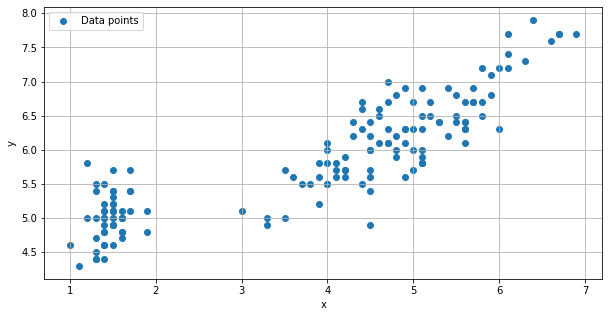

In [4]:
plt.figure(figsize = (10, 5))
plt.scatter(data['x'], data['y'], label = 'Data points')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [5]:
X_sum = np.sum(data['x'])
y_sum = np.sum(data['y'])

print('Sum of X values is ', X_sum)
print('Sum of y values is ', y_sum)

X_mean = np.mean(data['x'])
y_mean = np.mean(data['y'])

print('Mean of X values is ', X_mean)
print('Mean of y values is ', y_mean)

Sum of X values is  563.8
Sum of y values is  876.5
Mean of X values is  3.7586666666666693
Mean of y values is  5.843333333333335


In [6]:
xy = 0
for x, y in zip(data['x'], data['y']):
    xy += (x - X_mean) * (y - y_mean)
xy

189.7786666666667

In [7]:
X_squared = 0
for x in data['x']:
    X_squared += (x - X_mean) ** 2

In [8]:
b1 = xy / X_squared
b0 = y_mean - b1 * X_mean

In [9]:
def regressor(X):
    predictions = []
    try:
        for point in X:
            predictions.append(b0 + b1 * point)
        return predictions
    except TypeError as TE:
        return b0 + b1 * X

In [10]:
def R_Squared(X, y):
    xy = 0
    for x, y_ in zip(X, y):
        xy += (x - X_mean) * (y_ - y_mean)
    temp = xy / (np.std(X) * np.std(y))
    temp = temp / len(X)
    return temp ** 2

In [11]:
y_pred = regressor(data['x'])

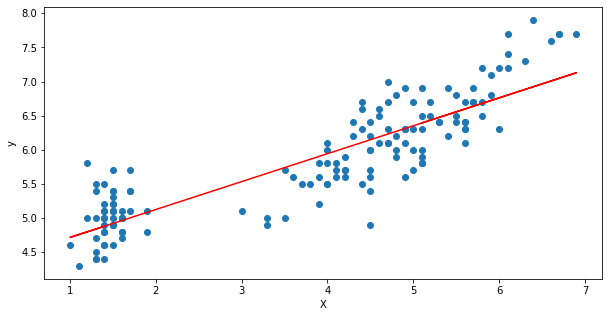

In [12]:
plt.figure(figsize=(10, 5))
plt.scatter(data['x'], data['y'], label = 'Actual')
plt.plot(data['x'], y_pred, color = 'red', label = 'Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [13]:
R_Squared(data['x'].values, data['y'].values)

0.7599553107783262

In [14]:
#Gradient Descent Method
class LinearRegression:
    def __init__(self):
        self.weights = []
        self.biases = np.random.randn()
        self.learning_rate = 0.01
    
    def predict(self, X):
        y_hat = []
        try:
            for x in X:
                temp = self.biases + np.matmul(self.weights, x.T)
                y_hat.append(temp)
            return np.array(y_hat)
        except TypeError as TE:
            return self.biases + np.matmul(self.weights, X.T)

    def mean_absolute_error(self, y, y_hat):
        return sum((y - y_hat)) / len(y)
    
    def root_mean_sqaured(self, y, y_hat):
        return np.sqrt(sum((y - y_hat) ** 2) / len (y))
    
    def gradient_descent(self, y, y_hat, X):
        self.biases -= self.learning_rate * (sum (y - y_hat)) * (-1 / X.shape[0])
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * (sum((y - y_hat) * X[:, i])) * (-1 / X.shape[0])
            self.weights = self.weights.astype('float32')

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        try:
            no_of_weights = X.shape[1]
        except:
            no_of_weights = 1
            X = X.reshape(-1, 1)
        self.weights = [np.random.randn() for _ in range(no_of_weights)]
        self.weights = np.array(self.weights)
        y_hat = self.predict(X)
        cost = self.mean_absolute_error(y, y_hat)
        rmse = self.root_mean_sqaured(y, y_hat)
        i = 0
        while rmse > 0 and i < 2000:
            self.gradient_descent(y, y_hat, X)
            y_hat = self.predict(X)
            cost = self.mean_absolute_error(y, y_hat)
            rmse = self.root_mean_sqaured(y, y_hat)
            i += 1
        
    def co_efficients(self):
        print('Bias value', self.biases)
        try:
            for i in range(len(self.weights)):
                print('Weight ', self.weights[i])
        except TypeError as TE:
            print('Weight ', self.weights[0])
        

In [15]:
reg = LinearRegression()

In [16]:
reg.fit(data['x'].values, data['y'].values)

In [17]:
y_pred_ = reg.predict(data['x'].values.reshape(-1, 1))

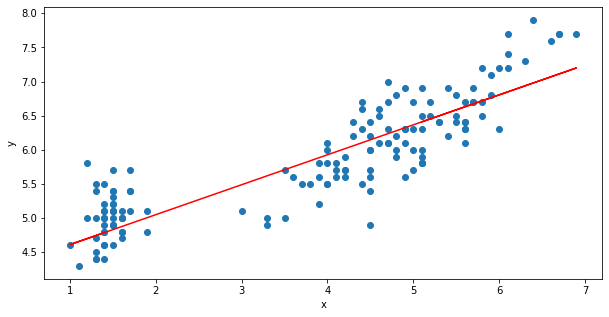

In [18]:
plt.figure(figsize = (10, 5))
plt.scatter(data['x'], data['y'], label = 'Actual')
plt.plot(data['x'], y_pred_, color = 'red', label = 'predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

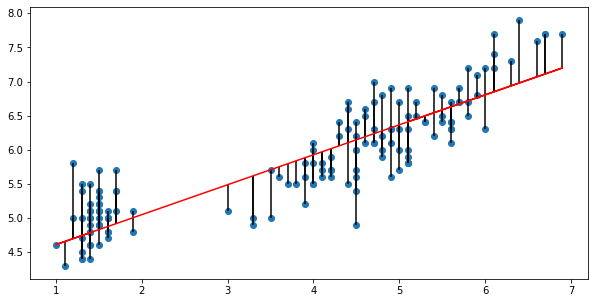

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(data['x'].values, data['y'].values)
plt.plot(data['x'].values, y_pred_, color = 'red')
for i in range(len(y_pred_)):
    plt.vlines(data['x'].values[i], min(y_pred_[i], data['y'].values[i]), max(y_pred_[i], data['y'].values[i]))
plt.show()

In [20]:
data['x2'] = data['x'].apply(lambda x : x ** 2)

In [21]:
data.head()

,x,y,x2
0,1.4,5.1,1.96
1,1.4,4.9,1.96
2,1.3,4.7,1.69
3,1.5,4.6,2.25
4,1.4,5.0,1.96


In [22]:
X = data.iloc[:, [0, 2]].values
y = data.iloc[:, 1].values

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [27]:
reg1 = LinearRegression()
reg1.fit(X, y)

In [28]:
reg1.predict(X)

array([4.8221172 , 4.8221172 , 4.79172326, 4.85317068, 4.8221172 ,
       4.91725625, 4.8221172 , 4.85317068, 4.8221172 , 4.85317068,
       4.85317068, 4.88488369, 4.8221172 , 4.73291398, 4.76198885,
       4.85317068, 4.79172326, 4.8221172 , 4.91725625, 4.85317068,
       4.91725625, 4.85317068, 4.70449864, 4.91725625, 4.98397996,
       4.88488369, 4.88488369, 4.85317068, 4.8221172 , 4.88488369,
       4.88488369, 4.85317068, 4.85317068, 4.8221172 , 4.85317068,
       4.76198885, 4.79172326, 4.85317068, 4.79172326, 4.85317068,
       4.79172326, 4.79172326, 4.79172326, 4.88488369, 4.98397996,
       4.8221172 , 4.88488369, 4.8221172 , 4.85317068, 4.8221172 ,
       6.19511723, 6.09145948, 6.30141313, 5.84385699, 6.14295859,
       6.09145948, 6.19511723, 5.52491403, 6.14295859, 5.7963151 ,
       5.61274291, 5.94091938, 5.84385699, 6.19511723, 5.65764665,
       6.04061991, 6.09145948, 5.89205842, 6.09145948, 5.7963151 ,
       6.24793541, 5.84385699, 6.30141313, 6.19511723, 5.99043

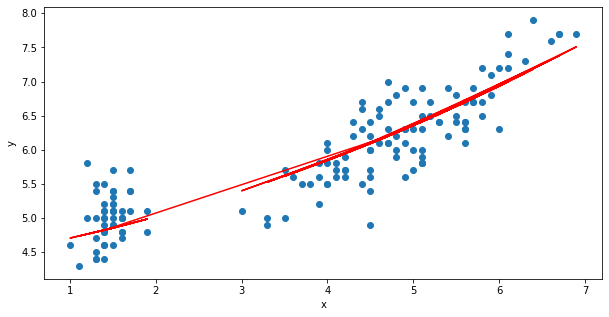

In [29]:
plt.figure(figsize = (10, 5))
plt.scatter(data['x'], data['y'], label = 'Actual')
plt.plot(data['x'], reg1.predict(X), color = 'red', label = 'predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
skreg = LinearRegression()

In [31]:
skreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

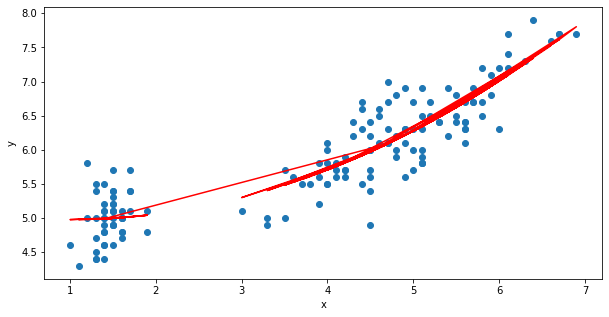

In [32]:
plt.figure(figsize = (10, 5))
plt.scatter(data['x'], data['y'], label = 'Actual')
plt.plot(data['x'], skreg.predict(X), color = 'red', label = 'predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()